## Model Training

This Jupyter Notebook presents the training of a Convolutional Neural Network (CNN) model designed to classify images of letters based on their respective fonts. The dataset utilized for this task is generated from the accompanying script, *Dataset_Generation.py*.

The primary objective of this Notebook is to develop a robust model capable of accurately identifying and classifying various font styles represented in the input images.
Following Fonts were used:

**Non-Serif**
- Arial
- Calibri
- CenturyGothic
- Futura
- GillSans
- Helvetica
- Motserrat
- OpenSans
- RobotBlack
- Verdana
  
**Sans**
- Baskerville
- Antiqua
- Courier
- Didot
- Garamond
- Georgia
- Merriweather
- Palatino
- Rockwell
- Times New Roman

The notebook outlines the methodology for preprocessing the data, constructing the CNN architecture, and training the model on the generated dataset.
At the conclusion of the training process, the model undergoes a comprehensive evaluation to assess its performance and classification accuracy. 

In [17]:
#!pip install opencv-python

In [18]:
import numpy as np
import cv2
import os
from sklearn.model_selection import train_test_split
from tensorflow import keras
import matplotlib.pyplot as plt
import seaborn as sns
import json
from keras import layers
from sklearn.metrics import classification_report, confusion_matrix

In [19]:
def show_image(image):
    plt.imshow(image, cmap='gray')
    plt.axis('off')
    plt.show()

## Load Dataset

In [23]:
def load_font_data(base_path='Dataset/'):
    images = []
    labels = []
    font_map = {}
    current_label = 0
    
    for font in sorted(os.listdir(base_path)):
        if font != ".DS_Store" and font != "Letter":
            font_path = os.path.join(base_path, font)
            if os.path.isdir(font_path):
                if font not in font_map:
                    font_map[font] = current_label
                    current_label += 1
                for letter in 'abcdefghijklmnopqrstuvwxyz':
                    letter_path = os.path.join(font_path, letter)
                    if os.path.isdir(letter_path):
                        for img_file in os.listdir(letter_path):
                            img_path = os.path.join(letter_path, img_file)
                            if os.path.exists(img_path):
                                img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
                                if img is None:
                                    print(f"Failed to load image: {img_path}")
                                    continue
                                try:
                                    img = cv2.resize(img, (28, 28))
                                    images.append(img)
                                    labels.append(font_map[font])
                                except cv2.error as e:
                                    print(f"Error resizing image {img_path}: {e}")
                            else:
                                print(f"File not found: {img_path}")

    
    return np.array(images), np.array(labels), font_map

In [ ]:
X, y, font_map = load_font_data()
print("Max label value:", np.max(y))
print("Unique labels:", np.unique(y))
print("Font map:", font_map)

num_classes = len(font_map)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

Failed to load image: Dataset/ARIAL/a/.ipynb_checkpoints
Failed to load image: Dataset/ARIAL/i/.ipynb_checkpoints
Failed to load image: Dataset/ARIAL/p/.ipynb_checkpoints
Failed to load image: Dataset/Didot/e/.ipynb_checkpoints
Failed to load image: Dataset/Times New Roman/a/.ipynb_checkpoints


In [ ]:
with open('Model/font_map.json', 'w') as json_file:
    json.dump(font_map, json_file, indent=4)
print(f"Font map saved as font_map.json")

## Define Model

In [11]:
model = keras.Sequential(
    [
    
        keras.Input(shape=(28, 28, 1)),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.BatchNormalization(),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Dropout(0.25),

        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.BatchNormalization(),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Dropout(0.25),

        layers.Conv2D(128, kernel_size=(3, 3), activation="relu"),
        layers.BatchNormalization(),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Dropout(0.25),

        layers.Flatten(),
        layers.Dense(128, activation="relu"),
        layers.BatchNormalization(),
        layers.Dropout(0.5),

        layers.Dense(num_classes, activation="softmax")
    ]
)

model.summary()

model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 batch_normalization (BatchN  (None, 26, 26, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 12, 12, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 10, 10, 64)        1

2024-10-03 19:56:08.053084: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2024-10-03 19:56:08.070720: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2024-10-03 19:56:08.071229: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2024-10-03 19:56:08.072179: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags

## Train Model

In [12]:
history = model.fit(
    X_train, y_train, 
    batch_size=128, 
    epochs=50, 
    validation_split=0.1
)

Epoch 1/50


2024-10-03 19:56:11.326904: I tensorflow/stream_executor/cuda/cuda_dnn.cc:384] Loaded cuDNN version 8101


234/234 [==============================] - 4s 6ms/step - loss: 2.5568 - accuracy: 0.2482 - val_loss: 6.9492 - val_accuracy: 0.0535
Epoch 2/50
234/234 [==============================] - 1s 5ms/step - loss: 1.6746 - accuracy: 0.4373 - val_loss: 7.2574 - val_accuracy: 0.0856
Epoch 3/50
234/234 [==============================] - 1s 5ms/step - loss: 1.3777 - accuracy: 0.5377 - val_loss: 2.1223 - val_accuracy: 0.4688
Epoch 4/50
234/234 [==============================] - 1s 5ms/step - loss: 1.1661 - accuracy: 0.6037 - val_loss: 1.0347 - val_accuracy: 0.6605
Epoch 5/50
234/234 [==============================] - 1s 5ms/step - loss: 1.0329 - accuracy: 0.6503 - val_loss: 1.3876 - val_accuracy: 0.5956
Epoch 6/50
234/234 [==============================] - 1s 5ms/step - loss: 0.9200 - accuracy: 0.6839 - val_loss: 0.8089 - val_accuracy: 0.7320
Epoch 7/50
234/234 [==============================] - 1s 5ms/step - loss: 0.8499 - accuracy: 0.7037 - val_loss: 4.2459 - val_accuracy: 0.2503
Epoch 8/50
234/23

## Evaluation

In [13]:
test_scores = model.evaluate(X_test, y_test, verbose=0)
print("Test loss:", test_scores[0])
print("Test accuracy:", test_scores[1])

Test loss: 0.3730638325214386
Test accuracy: 0.8652644157409668


### Confusion Matrix

260/260 [==============================] - 0s 1ms/step


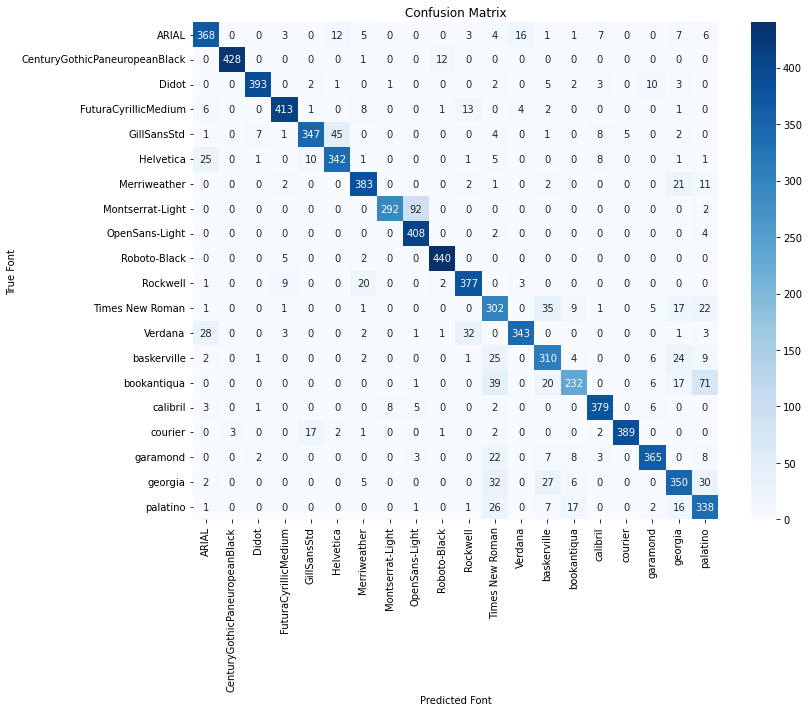

                               precision    recall  f1-score   support

                        ARIAL       0.84      0.85      0.85       433
CenturyGothicPaneuropeanBlack       0.99      0.97      0.98       441
                        Didot       0.97      0.93      0.95       422
         FuturaCyrillicMedium       0.95      0.92      0.93       449
                  GillSansStd       0.92      0.82      0.87       421
                    Helvetica       0.85      0.87      0.86       395
                 Merriweather       0.89      0.91      0.90       422
             Montserrat-Light       0.97      0.76      0.85       386
               OpenSans-Light       0.80      0.99      0.88       414
                 Roboto-Black       0.96      0.98      0.97       447
                     Rockwell       0.88      0.92      0.90       412
              Times New Roman       0.65      0.77      0.70       394
                      Verdana       0.94      0.83      0.88       414
     

In [15]:
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

cm = confusion_matrix(y_true, y_pred_classes)

plt.figure(figsize=(12, 10))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('True Font')
plt.xlabel('Predicted Font')

font_labels = [k for k, v in sorted(font_map.items(), key=lambda item: item[1])]
plt.xticks(np.arange(len(font_labels)) + 0.5, font_labels, rotation=90)
plt.yticks(np.arange(len(font_labels)) + 0.5, font_labels, rotation=0)

plt.tight_layout()
plt.savefig('confusion_matrix.png', dpi=300, bbox_inches='tight')

plt.show()

print(classification_report(y_true, y_pred_classes, target_names=font_labels))

### Predict Single Letter

In [11]:
def predict_font(image_path, model, font_map):
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    if img is None:
        print(f"Failed to read image at {image_path}")
        return None, 0
    img = cv2.resize(img, (28, 28))
    img = img.astype('float32') / 255.0
    img = np.expand_dims(img, axis=-1)
    img = np.expand_dims(img, axis=0)

    prediction = model.predict(img)
    predicted_class = np.argmax(prediction)

    inverse_font_map = {v: k for k, v in font_map.items()}
    predicted_font = inverse_font_map[predicted_class]

    confidence = np.max(prediction) * 100
    return predicted_font, confidence

In [18]:
image_path = "Dataset/Didot/e/7849.png"
predicted_font, confidence = predict_font(image_path, model, font_map)
print(f"The predicted font is {predicted_font} with a confidence of {confidence:.2f}%")

1/1 [==============================] - 0s 13ms/step
The predicted font is Didot with a confidence of 99.82%


In [19]:
model.save("Model/classification.keras")